In [36]:
##################################################################################################
# Patch-based Classification of Breast Cancer Histology Images using CNNs
# LE48: MiniProject
# Jan Ondras (jo356), Trinity College
# 2017/2018
##################################################################################################

import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np
from skimage.segmentation import mark_boundaries
from keras.models import load_model
import lime
from lime import lime_image

test_model_name = './../Model/SN_512_256_x00/SN_512_256_x00_w-50-0.74-0.70-1.01-0.63.hdf5'
# 77.8 on maxprob

# path_prefix = '/home/janciovec/Desktop/Patches/SN/'
TARGET_IMG = '/home/janciovec/Desktop/Patches/notSN/patches_512_256/validation/Invasive/iv068_0033.tif'

TARGET_IMG = '/home/janciovec/Desktop/Patches/notSN/patches_512_256/validation/Invasive/iv091_0004.tif'

TARGETS = [
'/home/janciovec/Desktop/Patches/notSN/patches_512_256/validation/Normal/n046_0010.tif', 
'/home/janciovec/Desktop/Patches/notSN/patches_512_256/validation/Benign/b039_0016.tif', 
'/home/janciovec/Desktop/Patches/notSN/patches_512_256/validation/InSitu/is056_0012.tif', 
'/home/janciovec/Desktop/Patches/notSN/patches_512_256/validation/Invasive/iv017_0006.tif', 
]

TARGETS = [
'/home/janciovec/Desktop/Patches/notSN/patches_512_256/validation/Normal/n047_0020.tif', 
'/home/janciovec/Desktop/Patches/notSN/patches_512_256/validation/Benign/b047_0006.tif', 
'/home/janciovec/Desktop/Patches/notSN/patches_512_256/validation/InSitu/is004_0001.tif', 
'/home/janciovec/Desktop/Patches/notSN/patches_512_256/validation/Invasive/iv052_0022.tif', 
]


model = load_model(test_model_name)
# print model.summary()
###########################################################
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(256, 256))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)


# images = transform_img_fn([TARGET_IMG])
images = transform_img_fn(TARGETS)

# explainer = lime_image.LimeImageExplainer()
# # Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, 
# # the superpixel will be replaced by the average of its pixels
# explanation = explainer.explain_instance(images[0], model.predict, top_labels=4, hide_color=0, 
#                                          num_samples=1000)

ex0 = lime_image.LimeImageExplainer().explain_instance(images[0], model.predict, top_labels=4, 
                                                               hide_color=0, num_samples=1000)
ex1 = lime_image.LimeImageExplainer().explain_instance(images[1], model.predict, top_labels=4, 
                                                               hide_color=0, num_samples=1000)
ex2 = lime_image.LimeImageExplainer().explain_instance(images[2], model.predict, top_labels=4, 
                                                               hide_color=0, num_samples=1000)
ex3 = lime_image.LimeImageExplainer().explain_instance(images[3], model.predict, top_labels=4, 
                                                               hide_color=0, num_samples=1000)

# temp, mask = explanation.get_image_and_mask(3, positive_only=True, num_features=5, hide_rest=False)
# plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
# plt.show()

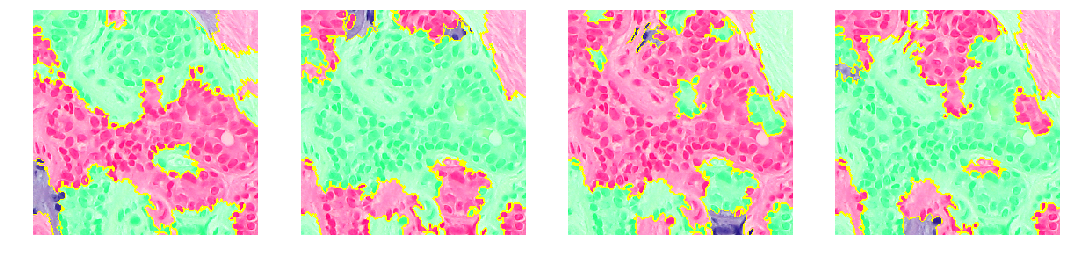

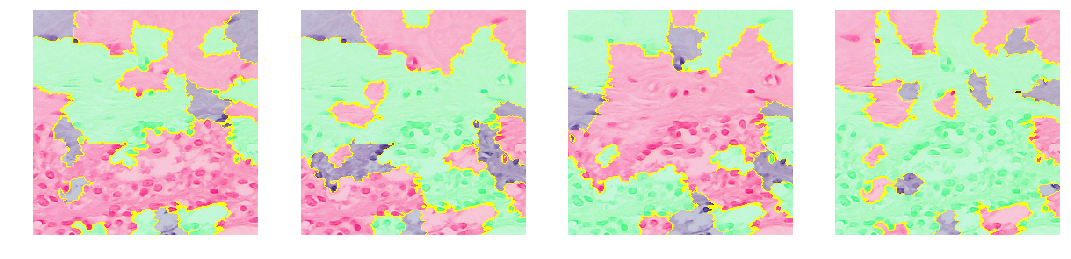

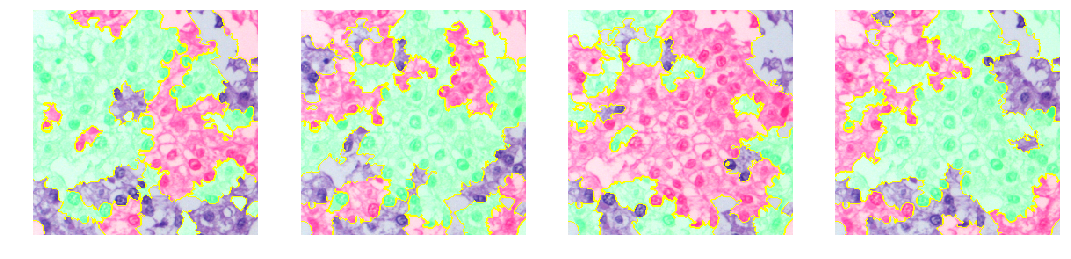

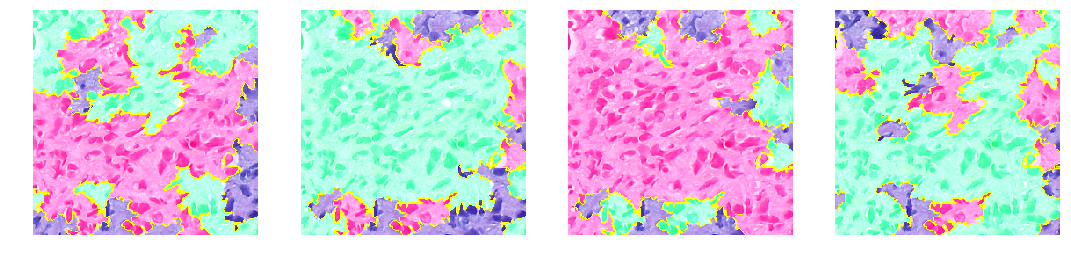

In [39]:
NF = 50
# temp, mask = ex0.get_image_and_mask(0, positive_only=False, num_features=NF, hide_rest=False)
# plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
# plt.show()
# temp, mask = ex1.get_image_and_mask(1, positive_only=False, num_features=NF, hide_rest=False)
# plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
# plt.show()
# temp, mask = ex2.get_image_and_mask(2, positive_only=False, num_features=NF, hide_rest=False)
# plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
# plt.show()
# temp, mask = ex3.get_image_and_mask(3, positive_only=False, num_features=NF, hide_rest=False)
# plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
# plt.show()

plt.figure(figsize=(15,6))
for i in range(4):
    plt.subplot(1,4,1+i)
    temp, mask = ex0.get_image_and_mask(i, positive_only=False, num_features=NF, hide_rest=False)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.axis('off')
plt.tight_layout()
plt.show()
plt.figure(figsize=(15,6))
for i in range(4):
    plt.subplot(1,4,1+i)
    temp, mask = ex1.get_image_and_mask(i, positive_only=False, num_features=NF, hide_rest=False)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.axis('off')
plt.tight_layout()
plt.show()
plt.figure(figsize=(15,6))
for i in range(4):
    plt.subplot(1,4,1+i)
    temp, mask = ex2.get_image_and_mask(i, positive_only=False, num_features=NF, hide_rest=False)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.axis('off')
plt.tight_layout()
plt.show()
plt.figure(figsize=(15,6))
for i in range(4):
    plt.subplot(1,4,1+i)
    temp, mask = ex3.get_image_and_mask(i, positive_only=False, num_features=NF, hide_rest=False)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.axis('off')
plt.tight_layout()
plt.show()

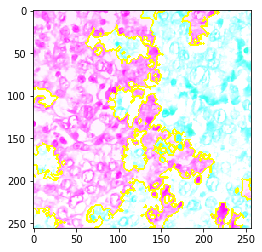

In [26]:




























temp, mask = explanation.get_image_and_mask(3, positive_only=False, num_features=5000, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

pros in green, cons in red


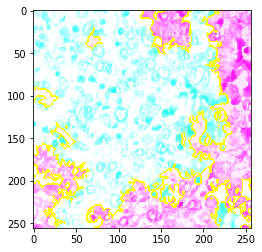

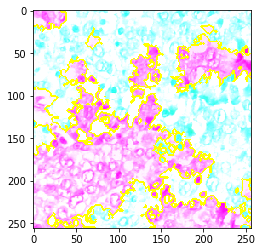

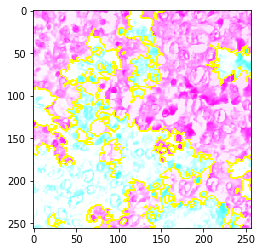

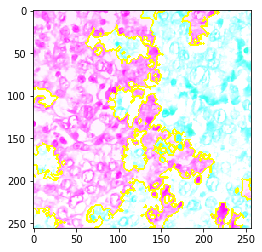

In [23]:
print "pros in green, cons in red"
for C in range(4):
    temp, mask = explanation.get_image_and_mask(C, positive_only=False, num_features=500, hide_rest=False)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.show()